# 矢量数据（Vector Data）

本课将介绍**矢量数据（Vector Data）**，包括一些理论背景知识、矢量数据的存储格式，并最终探索用于**矢量数据访问与处理的 Python 库**。

## 背景阅读（Background reading）

* https://docs.qgis.org/latest/en/docs/gentle_gis_introduction/vector_data.html （**强烈推荐！**）

## 什么是矢量数据（What is vector data?）

矢量数据是一种**空间数据（Spatial Data）**，通常由两个部分组成：

* 几何（Geometry）
* 属性（Attributes）

**几何（Geometries）** 指的是在 [Geometries Lesson](02-geometry.ipynb) 中介绍的 *点（Point）、线（Line）和面（Polygon）*。  
它们用于表示现实世界中对象或现象的**形状（shape）**。

**属性数据（Attribute data）** 是附加在几何之上的信息（或者反过来说，几何附加在属性之上），  
通常以**表格形式（records）**存在。

几何 + 属性 这一组合，通常被称为一个（空间）**要素（Feature）**。

![Vector Data in QGIS](images/qgis-attr-table.png)

[不规则三角网（Triangulated Irregular Network, TIN）](https://en.wikipedia.org/wiki/Triangulated_irregular_network)  
也是一种典型的**矢量数据**示例。

## 矢量数据格式（Vector data formats）

目前用于**存储（例如文件）**和**数据传输**的矢量数据格式已有  
[100 多种](https://gdal.org/drivers/vector/index.html)。  
下面将介绍其中**最常见的一些格式**。

> 提示：  
> [ogr2ogr](https://gdal.org/programs/ogr2ogr.html) 是一个 GDAL / OGR 的命令行工具，  
> 可以在大多数矢量数据格式之间进行转换。

### ESRI Shapefile

[ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) 是一种**基于文件的格式**。  
它至少由以下 3 个文件组成：

* `.shp`：包含几何信息（geometry）
* `.shx`：包含索引（index）
* `.dbf`：属性表（attribute table）

ESRI Shapefile 是**最古老的矢量数据格式之一**，  
甚至有人称其为地理信息学中的  
[“诅咒（Curse in Geoinformatics）”](https://www.slideshare.net/jachym/switch-from-shapefile)，  
并且它正越来越多地被 **GeoPackage** 所取代。

### GeoPackage

[GeoPackage](https://www.geopackage.org/) 是一种**相对较新但非常有前景**的空间数据格式，  
基于 [SQLite](https://www.sqlite.org) 文件型数据库。

[OGC GeoPackage Encoding Standard](https://www.opengeospatial.org/standards/geopackage)  
描述了一组约定，用于在一个 SQLite 数据库中存储以下内容：

* 矢量要素（vector features）
* 不同比例尺的影像与栅格地图的瓦片矩阵（tile matrix sets）
* 属性数据（非空间数据）
* 扩展（extensions）

因此，GeoPackage **既可以存储矢量数据，也可以存储栅格数据**。  
在一些场合中，GeoPackage 甚至被称为  
**“Shapefile Killer”**。

我们**推荐优先使用 GeoPackage，而不是 ESRI Shapefile**。

### GeoJSON

[GeoJSON](https://geojson.org) 是一种**基于 JSON 的简单格式**，用于编码矢量**要素（Features）**。  
它正变得越来越流行，尤其是在 **Web 开发者**中。

GeoJSON 也是新一代  
[OGC REST APIs](https://ogcapi.ogc.org/)  
（例如 [OGC API Features](https://ogcapi.ogc.org/features/)）中的**默认数据格式**。

示例：

```json
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands",
    "population": 4785
  }
}
```

GitHub 可以**直接在线渲染 GeoJSON 编码的数据**：  
https://github.com/jachym/jrdata/blob/master/jsons/stops.geojson

需要注意的是，GeoJSON 中的坐标顺序始终为 **“easting, northing”**，  
在这里也就是 **经度（longitude）、纬度（latitude）**。

在较早版本的  
[GeoJSON 规范](https://datatracker.ietf.org/doc/html/rfc7946)  
中，对**替代坐标参考系（Coordinate Reference Systems, CRS）**的支持已经被移除。

不过规范中也指出：

> “…where all involved parties have a prior arrangement, alternative coordinate reference systems can be used without risk of data being misinterpreted.”

目前，OGC 正在起草  
[JSON-FG](https://docs.ogc.org/DRAFTS/21-045.html)，  
用于扩展 GeoJSON，例如重新引入 **坐标参考系（CRS）** 等支持。

### Geography Markup Language（GML）

> Geography Markup Language（GML）是由 Open Geospatial Consortium（OGC）  
> 定义的一种 XML 语法，用于表达地理要素。  
> GML 既可作为地理信息系统的建模语言，  
> 也可作为互联网上地理数据交换的开放格式。  
> 来源：[Wikipedia](https://en.wikipedia.org/wiki/Geography_Markup_Language)

下面是前面以 GeoJSON 表示的同一个要素，  
使用 **GML** 表示的示例：

```xml
<gml:featureMember>
  <feature fid="12">
    <id>23</id>
    <name>Dinagat Islands</name>
    <population>4785</population>
    <ogr:geometry>
      <gml:Point gml:id="p21" srsName="http://www.opengis.net/def/crs/EPSG/0/4326">
        <gml:pos srsDimension="2">125.6, 10.1</gml:pos>
      </gml:Point>
    </ogr:geometry>
  </feature>
</gml:featureMember>
```

GML 被定义为一个 **ISO–OGC 联合标准**：

> ISO 19136《Geographic information – Geography Markup Language》  
> 是 ISO/TC 211 地理信息标准（ISO 191xx）家族中的一项标准。  
> 该标准源自于 Open Geospatial Consortium（OGC）对  
> Geography Markup Language（GML）的定义，  
> 并与 ISO 191xx 系列标准的统一。  
> 来源：[Wikipedia](https://en.wikipedia.org/wiki/Geography_Markup_Language)

*GML Application Schemas（GML 应用模式）*  
在 GML 标准之上增加了一套约定，用于定义**特定领域或社区的应用模型**。

典型示例包括：

* [CityGML](https://en.wikipedia.org/wiki/CityGML)
* [INSPIRE](https://inspire.ec.europa.eu/applicationschema) 体系内开发的应用模式

GML 在实际中仍被广泛使用，  
但由于其**复杂性**（例如坐标和投影存在多种编码方式）以及**冗长性**，  
在越来越多的场景中正被 **GeoJSON** 所取代。

### CSV

当然，你也可以将数据保存为  
**逗号分隔值（Comma-Separated Values, CSV）**文本文件。

### PostgreSQL / PostGIS 数据库

[PostGIS](https://postgis.net)  
为 PostgreSQL 对象-关系型数据库增加了对**地理对象**的支持。

实际上，PostGIS 使 PostgreSQL **具备空间能力（spatially enables）**，  
从而可以作为地理信息系统（GIS）的后端空间数据库使用，  
类似于 ESRI 的 SDE 或 Oracle 的 Spatial 扩展。

PostGIS 遵循 OGC 的  
[Simple Features Specification for SQL](https://www.opengeospatial.org/standards/sfs)，  
并已通过 “Types and Functions” 配置文件的合规认证。

正如前文所述，实际上还有  
[更多的矢量数据格式](https://gdal.org/drivers/vector/index.html)。

## 矢量数据处理库（Vector libraries）

在 Python 中，有大量库可用于与矢量数据进行交互。  
其中最常用的包括：

* GDAL / OGR 的 [Python 绑定](https://gdal.org/python/)（也称为 **OGR**）
* [Fiona](https://toblerity.org/fiona/manual.html)
* [GeoPandas](https://geopandas.org/)

本章将首先介绍 **Fiona 和 OGR**，  
并最终以 **GeoPandas** 作为结束。

[Fiona](https://toblerity.org/fiona/) 由  
[Sean Gillies](https://github.com/sgillies) 维护，  
它在 OGR 之上提供了一层**更符合 Python 风格的工具 / 封装接口**。

与 Fiona 相比，**OGR（Python 绑定）** 提供了  
对数据更细粒度的控制能力（例如坐标重投影），  
并支持 **所有 GDAL / OGR 的矢量数据格式**。

## 使用 Fiona 与 Shapely 操作要素（Manipulating features with Fiona and Shapely）

Fiona 和 Shapely 经常**配合使用**。

在这里，我们使用 **Fiona**  
将矢量数据（要素，Features）读取到内存中，  
以便后续使用 **Shapely** 进行几何操作和处理。

可以通过每个要素的 `geometry` 属性来访问其几何信息。  
例如，我们可以打开一个数据集，该数据集中每个国家都对应一个  
（多）多边形（(Multi)Polygon），  
并打印出一个**随机要素（国家）**的几何信息。

首先，我们导入 `Shapely` 及其相关函数，  
然后使用 `shape` 函数  
将 **JSON 编码的几何数据**转换为 **Geometry 对象**。

In [1]:
import fiona
from shapely.geometry import shape

接下来，我们打开一个名为 `countries` 的 **GeoPackage** 文件，并遍历其中的要素（Features）。

你可能会注意到 Fiona 所提供的一种典型 **Python 风格（Pythonism）**：  
通过使用 `with` 和 `as`，  
可以在**一步中完成数据集的打开与要素的遍历**。

> 注意：`countries` 文件中的几何数据使用的空间参考系（SRS / CRS）为 **EPSG:3857**，  
> 也称为  
> [Web Mercator 投影](https://en.wikipedia.org/wiki/Web_Mercator_projection)。  
> 该投影的单位是**米（meters）**，  
> 因此诸如 `area` 之类的数值，其单位也同样是米。

This is Canada


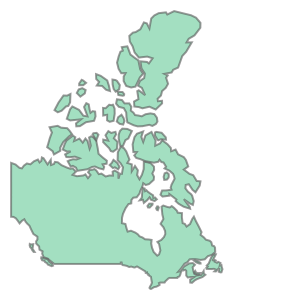

In [2]:
with fiona.open("../data/countries.3857.gpkg") as countries:
	country = countries[4]
	print(f'This is {country["properties"]["NAME"]}')
	geom = shape(country["geometry"])
  
geom # Jupyter can display geometry data directly

In [3]:
print(geom.geom_type)

MultiPolygon


In [4]:
print(geom.area)

52166480440472.38


In [5]:
# In km
print(geom.length / 1000)

143193.97061044376


让我们来看一些**几何（geometry）相关的方法**。

提示：**Shapely 的代码文档非常完善**，  
你可以随时使用 Python 内置的 `help()` 函数来查看相关说明。

In [6]:
help(geom)

Help on MultiPolygon in module shapely.geometry.multipolygon object:

class MultiPolygon(shapely.geometry.base.BaseMultipartGeometry)
 |  MultiPolygon(polygons=None)
 |  
 |  A collection of one or more Polygons.
 |  
 |  If component polygons overlap the collection is invalid and some
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  polygons : sequence
 |      A sequence of Polygons, or a sequence of (shell, holes) tuples
 |      where shell is the sequence representation of a linear ring
 |      (see LinearRing) and holes is a sequence of such linear rings.
 |  
 |  Attributes
 |  ----------
 |  geoms : sequence
 |      A sequence of `Polygon` instances
 |  
 |  Examples
 |  --------
 |  Construct a MultiPolygon from a sequence of coordinate tuples
 |  
 |  >>> from shapely import MultiPolygon, Polygon
 |  >>> ob = MultiPolygon([
 |  ...     (
 |  ...     ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)),
 |  ...     [((0.1,0.1), (0.1,0.2), (0.2,0.2), (0.2,0.1))]


例如，我们可以在多边形周围创建一个 **500 米的缓冲区（buffer）**，  
从而让该多边形变大一些（也就是让加拿大“稍微大一点”）：

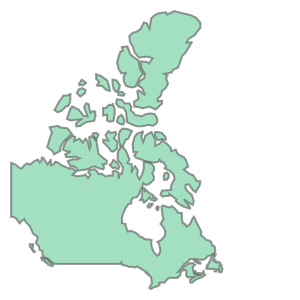

In [7]:
buffered_geom = geom.buffer(500)
buffered_geom

In [8]:
# In km
buffered_geom.length / 1000

143226.522869519

我们也可以使用 `shapely` 中提供的各种函数，  
**从零开始创建几何对象（geometries）**，如下所示：

In [9]:
from shapely.geometry import Polygon,Point,LineString
pt = Point(10,10)
line = LineString([(0,0),(0,3),(3,0)])
poly = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

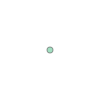

In [10]:
pt

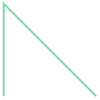

In [11]:
line

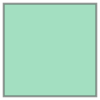

In [12]:
poly

#### 使用 Shapely 进行地理空间分析（Geospatial analysis using shapely）

In [13]:
poly.touches(line)

True

In [14]:
poly.contains(pt)

False

In [15]:
pt.buffer(20).contains(poly)

True

### 将几何转换回 JSON 格式（Converting the geometry back to JSON format）

当我们完成所有操作后，可以使用`shapely.geometry.mapping` 函数将几何对象转换回 **JSON 格式**。

In [16]:
from shapely.geometry import mapping

In [17]:
# let's create new GeoJSON-encoded vector feature

new_feature = {
    'type': 'Feature',
    'properties': {
        'name': 'My buffered feature'
    },
    'geometry': mapping(buffered_geom)
}
new_feature

# Now we could e.g. write the Feature back to file

{'type': 'Feature',
 'properties': {'name': 'My buffered feature'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [(((-6188931.0106208045, 6677370.464293878),
     (-6188946.776027165, 6677338.145689705),
     (-6248366.4625741765, 6565888.427229776),
     (-6321070.501018224, 6415617.308250209),
     (-6250135.34235398, 6472703.776711385),
     (-6250097.022229352, 6472731.727852816),
     (-6250056.226006083, 6472755.922199796),
     (-6250013.320800942, 6472776.142032404),
     (-6249968.692708993, 6472792.205396553),
     (-6249922.743329197, 6472803.967741351),
     (-6249875.886150513, 6472811.323219892),
     (-6249828.542830993, 6472814.205641747),
     (-6249781.139403374, 6472812.589068601),
     (-6249734.1024412885, 6472806.488047658),
     (-6249687.855220623, 6472795.957480743),
     (-6249642.813910545, 6472781.092130248),
     (-6249599.383828483, 6472762.0257663885),
     (-6174835.794234255, 6435615.374167498),
     (-6174792.548911795, 6435591.143649157),
  

## GDAL / OGR Python 绑定（GDAL/OGR Python Bindings）

[OGR](https://gdal.org/faq.html#what-is-this-ogr-stuff) 是[GDAL](https://gdal.org/) 库中用于支持**矢量数据**的组成部分。

OGR 支持大约  [100 多种矢量数据格式](https://gdal.org/drivers/vector/index.html)，并且相比 Fiona，还提供了一些**额外或不同的功能**，例如**坐标重投影（reprojection）**。

OGR 的 API 封装了不同矢量格式、Web 服务、数据库等之间的差异。  
在 OGR 中，使用以下术语体系：

* **Driver** —— 用于读写某一种指定格式的驱动
* **Data Source** —— 已命名的数据源（文件、数据库、Web 服务等）
* **Layer** —— 数据源中的数据层（例如文件内容、数据库表等）
* **Feature** —— 矢量要素
* **Field, Geometry** —— 属性字段与几何

OGR 的 Python 接口是在其原始 **C++ 代码中的类与方法之上**构建的一层抽象 API。

正因为如此，与原生 Python 风格的库（例如 Fiona）相比，OGR 的某些使用方式可能看起来**更为复杂**。

### 相关链接（Links）

* GDAL OGR Vector API 教程：  
  https://gdal.org/tutorials/vector_api_tut.html
* Python API：  
  https://gdal.org/python/
* GDAL / OGR Python Cookbook：  
  https://pcjericks.github.io/py-gdalogr-cookbook/ （**强烈推荐！**）

### 基本编程模式（Basic programming patterns）

首先，我们打开一个 **Data Source（数据源）**，并打印其包含的 **Layer（图层）数量**。同时需要注意，我们还会在全局范围内启用 **GDAL 的异常机制（Exceptions）**。
默认情况下，GDAL / OGR 的 Python 绑定在发生错误时 **不会抛出异常**。相反，它们通常会返回一个错误值（例如 `None`），并将错误信息写入 `sys.stdout`。
你可以通过调用 `UseExceptions()` 函数来启用异常机制。这是一种 **推荐的实践方式**。相关说明可参考以下教程：https://pcjericks.github.io/py-gdalogr-cookbook/gdal_general.html#enable-python-exceptions


In [18]:
from osgeo import ogr, gdal

# Exceptions will get raised on anything >= gdal.CE_Failure
gdal.UseExceptions()

ds = ogr.Open('../data/countries.gpkg')
print(ds)
print(ds.GetLayerCount())

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f2a3e0948f0> >
1


接下来，我们获取并打开一个 **Layer（图层）**。需要注意的是，对于像 GeoJSON 这样的文件，**数据源（Data Source, DS）中通常只有一个图层**，其索引为 0。而对于像 GeoPackage 以及一般的数据库型数据源，**可能包含多个图层**，其中每一个 Layer 都对应一张具体的数据表。

In [19]:
l = ds.GetLayer(0)
print(l)
print(l.GetFeatureCount())

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x7f2a3dbea1b0> >
176


显示该 **Layer（图层）** 的 **schema（结构定义）** 以及其 **几何类型（geometry type）** 的定义：

In [20]:
l.GetGeomType()

6

In [21]:
l.GetGeomType() == ogr.wkbMultiPolygon

True

In [22]:
for s in l.schema:
    print(s.GetName())

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
GDP_MD_EST
POP_YEAR
LASTCENSUS
GDP_YEAR
ECONOMY
INCOME_GRP
WIKIPEDIA
FIPS_10_
ISO_A2
ISO_A3
ISO_A3_EH
ISO_N3
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_A3_IS
ADM0_A3_US
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
NE_ID
WIKIDATAID
NAME_AR
NAME_BN
NAME_DE
NAME_EN
NAME_ES
NAME_FR
NAME_EL
NAME_HI
NAME_HU
NAME_ID
NAME_IT
NAME_JA
NAME_KO
NAME_NL
NAME_PL
NAME_PT
NAME_RU
NAME_SV
NAME_TR
NAME_VI
NAME_ZH


In [23]:
l.schema[4].name

'SOV_A3'

打印所有要素（Features）的 **name** 属性：

In [24]:
features_nr = l.GetFeatureCount()
for i in range(features_nr):
    f = l.GetNextFeature()
    print(f.GetField('NAME'))

Fiji
Tanzania
W. Sahara
Canada
United States of America
Kazakhstan
Uzbekistan
Papua New Guinea
Indonesia
Argentina
Chile
Dem. Rep. Congo
Somalia
Kenya
Sudan
Chad
Haiti
Dominican Rep.
Russia
Bahamas
Falkland Is.
Norway
Greenland
Fr. S. Antarctic Lands
Timor-Leste
South Africa
Lesotho
Mexico
Uruguay
Brazil
Bolivia
Peru
Colombia
Panama
Costa Rica
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Venezuela
Guyana
Suriname
France
Ecuador
Puerto Rico
Jamaica
Cuba
Zimbabwe
Botswana
Namibia
Senegal
Mali
Mauritania
Benin
Niger
Nigeria
Cameroon
Togo
Ghana
Côte d'Ivoire
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Central African Rep.
Congo
Gabon
Eq. Guinea
Zambia
Malawi
Mozambique
eSwatini
Angola
Burundi
Israel
Lebanon
Madagascar
Palestine
Gambia
Tunisia
Algeria
Jordan
United Arab Emirates
Qatar
Kuwait
Iraq
Oman
Vanuatu
Cambodia
Thailand
Laos
Myanmar
Vietnam
North Korea
South Korea
Mongolia
India
Bangladesh
Bhutan
Nepal
Pakistan
Afghanistan
Tajikistan
Kyrgyzstan
Turkmenistan
Iran
Syria
A

获取矢量要素的包围盒（bounding box / envelope）：

In [25]:
f = l.GetFeature(4)
geom = f.GetGeometryRef()
geom.GetEnvelope()

(-140.99778, -52.64809872090421, 41.675105088867326, 83.23324)

获取几何的质心（centroid）：

In [26]:
c = geom.Centroid()
c.GetPoint()

(-98.14238137209698, 61.46907614534888, 0.0)

获取几何的缓冲区（buffer）：

In [27]:
buff = c.Buffer(100)
geom.Intersects(buff)

True

### 完整示例（Complete example）

在这个示例中，我们将演示一次**从头到尾的矢量数据处理流程**：打开数据集、读取元数据、修改属性，并将新的属性保存回文件中。

In [28]:
from osgeo import osr

# Creating new file with new driver
drv = ogr.GetDriverByName('GML')
ds = drv.CreateDataSource('../data/04-ogr-out.gml')
srs = osr.SpatialReference()
srs.ImportFromEPSG(3857)
print(srs.ExportToProj4())
layer = ds.CreateLayer('outgml', srs, ogr.wkbLineString)

# create new attributes named and code
field_name = ogr.FieldDefn('name', ogr.OFTString)
field_name.SetWidth(24)
field_number = ogr.FieldDefn('code', ogr.OFTInteger)
layer.CreateField(field_name)
layer.CreateField(field_number)

# create new line geometry and read from WKT
line = ogr.CreateGeometryFromWkt('LINESTRING(%f %f, %f %f)' % (0, 0, 1, 1))

# create new feature, set attributes and geometry
feature = ogr.Feature(layer.GetLayerDefn())
feature.SetGeometry(line)
feature.SetField('name', 'the line')
feature.SetField('code', 42)

layer.CreateFeature(feature)

# final cleaning
feature.Destroy()
ds.Destroy()

+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs


现在我们可以检查结果。

In [29]:
ds = ogr.Open('../data/04-ogr-out.gml')
layer = ds.GetLayer(0)
print(layer.GetFeatureCount())
print(layer.GetFeature(0).GetField('name'))
print(layer.GetFeature(0).GetField('code'))
ds.Destroy()

1
the line
42


## Fiona 还是 GDAL / OGR？

使用 Fiona，上面的示例会更加**简洁且符合 Python 风格（Pythonic）**。然而，与 Fiona 相比，OGR 在更**底层、更高效**的层面上访问数据，因此在处理**更大规模的数据集**时更加有优势。此外，OGR 还支持**更多的数据格式**以及诸如 **坐标重投影（reprojection）** 等功能。

我们建议在工具箱中**同时具备 Fiona（配合 Shapely）和 OGR**，并在具体项目中根据需求评估使用哪一个。

另外还有 **GeoPandas**（接下来将介绍），它构建于 Fiona（因此也基于 GDAL）、Shapely 以及著名的数据分析库 [Pandas](https://pandas.pydata.org/) 之上，提供了**更高层次的抽象**。

## GeoPandas 简介（Introduction to GeoPandas）

地理空间数据通常以特定的 GIS 文件格式或数据存储方式提供，例如 ESRI Shapefile、GeoJSON 文件、GeoPackage 文件、PostGIS（PostgreSQL）数据库等。

我们可以使用 [GeoPandas](https://geopandas.org/) 库来读取其中许多 GIS 数据格式。GeoPandas 在底层依赖 `Fiona` 库（它是 GDAL / OGR 的一个接口），并通过 `geopandas.read_file` 函数来完成数据读取。

### 什么是 GeoDataFrame？（What's a GeoDataFrame?）

当使用 GeoPandas 读取地理空间数据时，返回的是一个所谓的 `GeoDataFrame`。

GeoDataFrame 包含的是一种**表格化的地理空间数据集**，本质上可以理解为一个要素集合（Feature collection / record-set）：

* 它包含一个 **`geometry` 列**，用于存储几何信息。
* 其余的列是用于描述每个几何对象的 **属性（attributes）**。

这样的 `GeoDataFrame` 在使用方式上与 Pandas 的 `DataFrame` 非常相似，但额外提供了一些用于处理地理空间数据的功能：

* 提供一个 `.geometry` 属性，用于始终返回包含几何信息的那一列（返回的是一个 `GeoSeries`）。该列在表中的实际列名不一定必须叫做 `geometry`，但始终可以通过 `.geometry` 属性访问。
* 提供了一些额外的空间分析方法（例如：`area`、`distance`、`buffer`、`intersection` 等），我们将在后面逐一介绍。

In [30]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

pd.options.display.max_rows = 10

### 加载数据（Loading Data）

第一步是加载数据。  
这些数据可以来自本地文件、数据库中的数据，或者托管在某个服务器上的文件。  
基本上就是我们前面介绍过的**任意一种（矢量）数据格式**。

#### 加载 Shapefile（Loading a Shapefile）

加载所有国家的几何数据  
（数据来源：https://www.naturalearthdata.com/downloads/10m-cultural-vectors/）

In [31]:
#load it as a GeoDataFrame, i.e. a Pandas DataFrame with with a geometry data column
countries = gpd.read_file('../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [32]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [33]:
countries.tail(10)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
167,Admin-0 country,1,5,Somaliland,SOL,0,2,Sovereign country,1,Somaliland,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((48.9482 11.41062, 48.9482 11.41062, ..."
168,Admin-0 country,1,3,Uganda,UGA,0,2,Sovereign country,1,Uganda,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 31.86617 -1.02736, 3..."
169,Admin-0 country,1,3,Rwanda,RWA,0,2,Sovereign country,1,Rwanda,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.4191 -1.13466, 30.81613 -1.69891,..."
170,Admin-0 country,1,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,1,Bosnia and Herzegovina,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.56 42.65, 17.67492 43.02856, 17.2..."
171,Admin-0 country,1,6,North Macedonia,MKD,0,2,Sovereign country,1,North Macedonia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.38053 42.32026, 22.88137 41.9993,..."
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."
176,Admin-0 country,1,3,South Sudan,SDS,0,2,Sovereign country,1,South Sudan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.83385 3.50917, 29.9535 4.1737, 29..."


<Axes: >

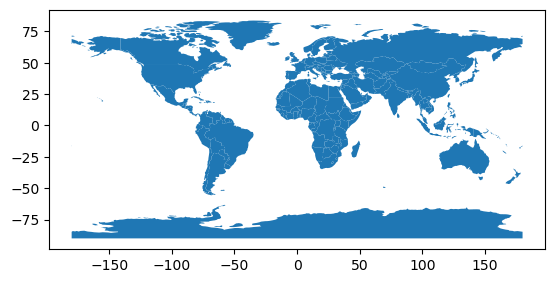

In [34]:
countries.plot()

In [35]:
places = gpd.read_file('../data/populated_places.gpkg')

places

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.9361)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.2 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,ルクセンブルク市,룩셈부르크,Luxemburg,Luksemburg,Luxemburg,Lüksemburg,Luxembourg,4,1159146437,POINT (6.13 49.61166)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,600,1,Admin-1 capital,Rio de Janeiro,None,None,0,Rio de Janeiro,0.0,...,リオデジャネイロ,리우데자네이루,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,4,1159151619,POINT (-43.22697 -22.92308)
239,0,600,1,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,0,Sao Paulo,0.0,...,サンパウロ,상파울루,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,4,1159151621,POINT (-46.62697 -23.55673)
240,0,600,3,Admin-1 capital,Sydney,None,None,0,Sydney,0.0,...,シドニー,시드니,Sydney,Sydney,Sydney,Sidney,Sydney,4,1159151623,POINT (151.18323 -33.91807)
241,0,600,0,Admin-0 capital,Singapore,None,None,0,Singapore,1.0,...,シンガポール,싱가포르,Singapore,Singapur,Singapore,Singapur,Singapore,4,1159151627,POINT (103.85387 1.29498)


#### 加载 GeoJSON 文件（Loading a GeoJSON file）

加载本地的 GeoJSON 文件。

In [36]:
rivers = gpd.read_file('../data/rivers.geojson')
rivers

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.4511 17.8205, 95.42766 17..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,2049Lake Centerline,10.0,Lake Centerline,Ohau,None,2049,None,7.2,Ohau,8.2,...,None,None,None,None,None,None,None,4,1159129657,"MULTILINESTRING ((170.1926 -44.34343, 170.2005..."
1451,219River,6.0,River,Po,None,219,Version 4 edit,5.0,Po,6.0,...,Pad,Rio Pó,По,Po,Po Nehri,Sông Po,波河,4,1159129663,"MULTILINESTRING ((7.64746 44.83906, 7.61408 44..."
1452,178River,5.0,River,Loire,None,178000,Changed in 2.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129671,MULTILINESTRING EMPTY
1453,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129677,"MULTILINESTRING ((3.07819 46.98509, 3.07171 46..."


#### 加载 PostgreSQL 表（Loading PostgreSQL table）

从数据库中加载数据。（这里只展示代码示例，你可以自行运行并在本地搭建、填充一个启用了 PostGIS 的数据库。）

```python
import psycopg2 

con = psycopg2.connect(database="postgres", user="postgres", password="postgres",
    host="localhost")

sql = "SELECT * FROM public.places"
places = gpd.read_postgis(sql, con, geom_col='geom')
```

#### 导入 CSV 文件（Importing a CSV file）

假设该 CSV 文件包含一个使用 OGC Well-Known Text（WKT）格式表示几何的列：

In [37]:
from shapely import wkt

airport = gpd.read_file('../data/airport.csv')

airport['geometry'] = airport['geom'].apply(wkt.loads)
del airport['geom']
airport = gpd.GeoDataFrame(airport, crs='epsg:4326')
airport

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,...,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,...,,,,,,,,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,...,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.3236 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.000,...,Port lotniczy Ahwaz,,,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,...,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,Airport,major,Madrid Barajas,MAD,terminal,LEMD,MAD,http://en.wikipedia.org/wiki/Madrid_Barajas_In...,150.000,...,Port lotniczy Madryt-Barajas,Aeroporto de Adolfo Suárez Madrid-Barajas,Барахас,Madrid-Barajas flygplats,Madrid Barajas Uluslararası Havalimanı,Sân bay quốc tế Madrid Barajas,马德里－巴拉哈斯机场,4,1159127851,POINT (-3.56903 40.46813)
887,2,Airport,major,Luis Muñoz Marin,SJU,terminal,TJSJ,SJU,http://en.wikipedia.org/wiki/Luis_Mu%C3%B1oz_M...,150.000,...,Port lotniczy Luis Muñoz Marín,Aeroporto Internacional Luis Muñoz Marin,Каролина,Luis Muñoz Marín International Airport,,Sân bay quốc tế Luis Muñoz Marín,路易斯·穆尼奥斯·马林国际机场,4,1159127861,POINT (-66.00423 18.43808)
888,2,Airport,major,Arlanda,ARN,terminal,ESSA,ARN,http://en.wikipedia.org/wiki/Stockholm-Arlanda...,150.000,...,Port lotniczy Sztokholm-Arlanda,Aeroporto de Arlanda,Стокгольм-Арланда,Stockholm Arlanda Airport,Stockholm-Arlanda Havalimanı,Sân bay Stockholm-Arlanda,斯德哥爾摩－阿蘭達機場,4,1159127877,POINT (17.93073 59.65112)
889,2,Airport,major,Soekarno-Hatta Int'l,CGK,parking,WIII,CGK,http://en.wikipedia.org/wiki/Soekarno-Hatta_In...,150.000,...,Port lotniczy Dżakarta-Soekarno-Hatta,Aeroporto Internacional Soekarno-Hatta,Сукарно-Хатта,Soekarno-Hatta International Airport,Soekarno-Hatta Uluslararası Havalimanı,Sân bay quốc tế Soekarno-Hatta,蘇加諾－哈達國際機場,4,1159127891,POINT (106.6543 -6.1266)


#### 动态创建几何（Creating a geometry on the fly）

从一个包含标准文本列（例如 `longitude` 或 `lon`，以及 `latitude` 或 `lat`）的 CSV 文件创建 `GeoDataFrame`。  
这些列将被用来在创建 `GeoDataFrame` 时**即时生成几何列（geometry column）**。

In [38]:
import pandas as pd
df = pd.read_csv('../data/stadium.csv')
stadium = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))
stadium

,name,capacity,lat,lon,geometry
0,Eden Gardens,66349,22.564608,88.341071,POINT (88.34107 22.56461)
1,Wankhede Stadium,33108,18.938853,72.823570,POINT (72.82357 18.93885)
2,Narendra Modi Stadium,132000,18.984750,73.119733,POINT (73.11973 18.98475)
3,M. A. Chidambaram Stadium,54000,13.062866,80.278154,POINT (80.27815 13.06287)
4,Arun Jaitley Stadium,41820,28.637923,77.240979,POINT (77.24098 28.63792)


#### 手动创建 GeoDataFrame（Creating a GeoDataFrame manually）

你也可以通过编程方式手动创建一个 GeoDataFrame，例如在 Notebook 中使用你自己的数据来构建：

In [39]:
from shapely.geometry import Point

parking_enforcement = gpd.GeoDataFrame({
    'id': [1, 2,3,4,5],
    'geometry': [Point(1, 1), Point(2, 2),Point(2, 1),Point(1, 2),Point(1.5, 2)],
    'parking_meters': [12,34,112,41, 212]})
parking_enforcement

,id,geometry,parking_meters
0,1,POINT (1 1),12
1,2,POINT (2 2),34
2,3,POINT (2 1),112
3,4,POINT (1 2),41
4,5,POINT (1.5 2),212


### 在 GeoPandas 中处理 CRS（Handling CRS in GeoPandas）

与 `Shapely` 不同，`GeoPandas` **能够理解坐标参考系（CRS）的概念**，其底层依赖的是 [pyproj](https://pyproj4.github.io/pyproj/stable/)。

为什么 CRS 很重要？

- CRS 定义提供了一种**标准化机制**，用于传达数据集所使用的投影信息，从而确保几何对象被**正确、精确地放置**。
- CRS 能帮助我们正确理解数据的含义，例如**坐标单位是度还是米**。
- 将所有数据统一到**相同的 CRS**，才能进行可靠的空间分析。

显示一个 GeoDataFrame 的 CRS

In [40]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

我们也可以为一个**尚未设置默认 CRS 的 GeoDataFrame** 手动指定坐标参考系（CRS）。

In [41]:
parking_enforcement = parking_enforcement.set_crs('epsg:4326')
parking_enforcement.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

我们可以将一个 GeoDataFrame 从一种 CRS 转换为另一种 CRS，这一过程通常被称为 **重投影（reprojection）**。

In [42]:
parking_enforcement.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
parking_enforcement_3857 = parking_enforcement.to_crs(3857)

In [44]:
parking_enforcement_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

GeoPandas 中剩余的章节被标记为 **“ADVANCED”**，在本次工作坊中可能不会涉及。  
这些内容将作为练习留给你自行探索。

### 合并 DataFrame（Merging DataFrames）— ADVANCED

#### 基于属性的合并（Attribute based merge）

In [ ]:
neighbor = pd.DataFrame({
    'id': [1, 2,3,4,5],
    'neighbor_id': ['a1', 'a2','b3','c4','d5'],
    'neighbor_name': ['andy','julio','droid','steve', 'ramesh']})
neighbor

In [ ]:
updated_parking_enforcement = parking_enforcement.merge(neighbor, on='id')
updated_parking_enforcement

#### Spatial merge

GeoPandas also provides functions for "Spatial Joins".
We won't go in many details here, but it is a very powerful
feature you may want to check out. Some examples below:


```python
pd.set_option('display.max_columns', 100)
airport = airport.set_crs('epsg:4326')
airport.head()

simple_countries = countries[['ADMIN','geometry']]
simple_countries.head()

airport_with_country = gpd.sjoin(airport, simple_countries, how="inner", op='intersects')
airport_with_country.head()

```

The `op` parameter is another way to perform same query can be using
 operation `within` instead of `intersect`:

```python
airport_with_country_within = gpd.sjoin(airport, simple_countries, how="inner", op='within')
airport_with_country.head()

```
Further parameters:

The `how` parameter. We can use `left` , `right` , `inner` .

* `left`: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column
* `right`: use the index from second (or right_df); retain only the right_df geometry column
* `inner`: use the intersection of index values from both geodataframes; retain only the left_df geometry column

```python
airport_with_country_right = gpd.sjoin(airport, simple_countries, how="right", op='within')
airport_with_country_right.head()
```

### Edit the existing data - ADVANCED

#### Editing metadata

In [ ]:
updated_parking_enforcement.iloc[0]

In [ ]:
updated_parking_enforcement.iloc[0,2] = 24

In [ ]:
updated_parking_enforcement.iloc[0]

#### Editing geometry

In [ ]:
from shapely.geometry import Point

updated_point = Point(3,4)
updated_parking_enforcement.iloc[0,1] = updated_point
# alternatively we can use a named field
updated_point = Point(5,5)
updated_parking_enforcement.loc[1, "geometry"] = updated_point
updated_parking_enforcement

### Querying data - ADVANCED

#### Based on metadata

In [ ]:
countries.head()

In [ ]:
India = countries[countries['ADMIN'] == "India"]
India

In [ ]:
densly_pop = countries[countries['POP_EST'] > 100000000]
densly_pop

In [ ]:
countriesWithC = countries[countries['SOVEREIGNT'].str.startswith('C')]
countriesWithC

In [ ]:
densecountriesWithC = countries[(countries['SOVEREIGNT'].str.startswith('C')) &  (countries['POP_EST'] > 1000000000)]
densecountriesWithC

#### Spatial query

Spatial query uses shapely geometry as base geometry on top of which geodataframe can be queried.
Available oprations are listed at
https://shapely.readthedocs.io/en/latest/manual.html#binary-predicates

In [ ]:
indian_shape = India['geometry'].squeeze()

In [ ]:
type(India['geometry'].squeeze())

In [ ]:
test_pt = Point(1,1)

In [ ]:
test_pt.intersects(indian_shape)

In [ ]:
nashik = Point(73.76,19.93)

In [ ]:
nashik.within(indian_shape)

In [ ]:
indian_airport = airport[airport.within(indian_shape)]
indian_airport

#### Quiz: Can you create the dataframe of all airports and cities within your country

In [ ]:
indian_rivers = rivers[rivers.intersects(indian_shape)]
indian_rivers.plot()

In [ ]:
Neighbours_India = countries[countries.touches(indian_shape)]
Neighbours_India.plot()

### Geospatial Operations - ADVANCED

Understanding base logic first! Back to Shapely.

In [ ]:
test_point = Point(0,0)
test_point

In [ ]:
test_point.buffer(10)

In [ ]:
test_point.buffer(10).area

In [ ]:
from shapely.geometry import LineString

test_line = LineString([(0, 0), (1, 1), (0, 2)])
test_line

In [ ]:
#Buffer puts original geometry at center and create buffer alongside
test_line.buffer(0.1)

In [ ]:
#We can also put geometry on either side ( Positive value will put buffer to left)

test_line.buffer(0.5, single_sided=True)

In [ ]:
#We can also put geometry on either side ( negative value will put buffer to right)

test_line.buffer(-0.5, single_sided=True)

#### Operations in `geopandas`

In [ ]:
Indian_cities =  places[places.within(indian_shape)]
Indian_cities

In [ ]:
Indian_cities_m = Indian_cities.to_crs(3857)
Indian_cities_m.crs

In [ ]:
city_buffer = Indian_cities_m[['geometry','NAME']]
city_buffer

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 16))
India.plot(ax=ax, color='#ffffff', edgecolor='#6a6a6a', linewidth=2)
city_buffer.plot(ax=ax, color='#f00', edgecolor='#000000')

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
city_buffer['geom'] = city_buffer.buffer(50000)
city_buffer

In [ ]:
countries_centroid = countries[['geometry','NAME','CONTINENT']]
countries_centroid = countries_centroid.to_crs(3857) # all operations should be carried out in meters, thus we convert it in 3857
countries_centroid.head()

In [ ]:
countries_centroid['geometry'] = countries_centroid['geometry'].centroid
countries_centroid = countries_centroid.to_crs(4326) # once operations are done in above step, we can shift it back to original CRS
countries_centroid.head()

In [ ]:
countries = countries.to_crs(3857) # all operations should be carried out in meters, thus we convert it in 3857
countries['area'] = countries['geometry'].area
countries = countries.to_crs(4326)  # once operations are done in above step, we can shift it back to original CRS
countries.head()

### Visualising a GeoDataFrame - ADVANCED

In [ ]:
#simple visualisation 
countries.plot()

In [ ]:
countries_m = countries[countries['NAME'] != "Antarctica"]
countries_m.plot()

In [ ]:
#color based on column
countries_m.plot(column='CONTINENT')

In [ ]:
countries_m.plot(column='CONTINENT',legend=True)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
countries_m.plot(ax=ax,column='CONTINENT',legend=True)

In [ ]:
ax = countries_m.plot(column='CONTINENT',legend=True)
ax.set_axis_off()

In [ ]:
#Checkout available color maps => https://matplotlib.org/2.0.2/users/colormaps.html
countries_m.plot(column='CONTINENT',  cmap='winter')


In [ ]:
countries_plot = countries_m[(countries_m['NAME'] != 'India') & (countries_m['NAME'] != 'China')]
countries_plot.plot(column='POP_EST',legend=True,figsize=(16,16), legend_kwds={'label': 'Population'})

#### matplotlib to show multiple data

In [ ]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m = places.to_crs(3857)
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

In [ ]:
#load world polygon
bbox = gpd.read_file('../data/world.geojson')
world = bbox.loc[0].geometry
world

In [ ]:
cities_m = cities_m[cities_m.within(world)]

In [ ]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

#### geopandas overlay to show multiple data

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))

India.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
Indian_cities_m.plot(ax=ax, color='r', edgecolor='#fff')


In [ ]:
Indian_cities_m['geometry'] = Indian_cities_m['geometry'].buffer(50000)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))

India.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
Indian_cities_m.plot(ax=ax, color='r', edgecolor='#fff')

You may also do an `overlay` function:

```
non_rural_area = gpd.overlay(India, Indian_cities_m, how='difference')
non_rural_area.plot(figsize=(16, 16))
```

---
[<- 坐标参考系统（Coordinate Reference Systems）](03-coordinate-reference-systems.ipynb) | [栅格数据（Raster data） ->](05-raster-data.ipynb)
